In [1]:
import sys
sys.path.append('../lib')
from table_detection import TableNet, Pipeline, TableMask, ColumnMaskProcessor
from utils import *
import cv2
from shutil import copyfile
import os
import numpy as np
import imutils
import tqdm
from utils import *
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
model = TableNet.build()
latest = tf.train.latest_checkpoint('models/2020_09_23')
model.load_weights(latest)

In [4]:
images = [os.path.join('../data/test_images/',file) for file in os.listdir('../data/test_images/') if file.split('.')[-1]=='jpg']

In [5]:
import random
random.shuffle(images)

In [12]:
for image in tqdm.tqdm(images):
    try:
        pipeline = Pipeline(model,tf.image.decode_jpeg((tf.io.read_file(image))))
        pipeline.run(0.8)
        plt.imsave(os.path.join('../results/table_detected/',image.split('/')[-1]),pipeline.images[-1].numpy())
      #  column_mask_processor = ColumnMaskProcessor(pipeline.images[-1],pipeline.predicted_column_masks[-1].numpy().reshape(256,256).astype('uint8'))
      #  column_mask_processor.process_mask()
      #  column_mask_processor.get_peaks(20,25)
      #  column_mask_processor.find_column_areas()
        
      #  pipeline.tm_list[-1].draw_bounding_box()
      #  plt.figure(figsize=(10,5))
      #  plt.title("Original Image")
      #  plt.imshow(pipeline.tm_list[0].image)
      #  plt.figure(figsize=(10,5))
      #  plt.title("Detected Table")
      #  plt.imshow(pipeline.tm_list[-1].image_with_bounding_box)
      #  plt.figure(figsize=(5,1))
      #  plt.plot(column_mask_processor.signal)
      #  plt.plot(column_mask_processor.signal_peaks, column_mask_processor.signal[column_mask_processor.signal_peaks], "x")
      #  plt.plot(np.zeros_like(column_mask_processor.signal), "--", color="gray")
      #  plt.show()
      #  
      #  plt.figure(figsize=(20,10))
      #  for num, area in enumerate(column_mask_processor.column_areas):
      #      plt.subplot(1,len(column_mask_processor.column_areas),num+1)
      #      plt.title("column {}".format(num))
      #      plt.axis('off')
      #      plt.imshow(area)
      #      plt.imsave(os.path.join('../data/line_detection_data/',image.split('/')[-1]),cv2.rotate(pipeline.images[-1].numpy(), cv2.ROTATE_90_CLOCKWISE))
    except:
        pass

100%|██████████████████████████████████████████████████████████████████████████████████| 61/61 [02:29<00:00,  2.45s/it]


In [ ]:
plt.imshow(cv2.rotate(cv2.imread(images[11]), cv2.ROTATE_90_CLOCKWISE))

In [ ]:
image = '../data/test_images/5411188126270.nutrition.jpg'
#image = images[2]

In [ ]:
pipeline = Pipeline(model, tf.image.decode_jpeg((tf.io.read_file(image))))
pipeline.run(0.7,loop_until_converge=False)
column_mask_processor = ColumnMaskProcessor(pipeline.images[-1],pipeline.predicted_column_masks[-1].numpy().reshape(256,256).astype('uint8'))
column_mask_processor.process_mask()
column_mask_processor.get_peaks(10,25)
column_mask_processor.find_column_areas()

pipeline.tm_list[-1].draw_bounding_box()
plt.figure(figsize=(10,5))
plt.title("Original Image")
plt.imshow(pipeline.tm_list[0].image)
plt.figure(figsize=(10,5))
plt.title("Detected Table")
plt.imshow(pipeline.tm_list[-1].image_with_bounding_box)
plt.figure(figsize=(5,1))
plt.plot(column_mask_processor.signal)
plt.plot(column_mask_processor.signal_peaks, column_mask_processor.signal[column_mask_processor.signal_peaks], "x")
plt.plot(np.zeros_like(column_mask_processor.signal), "--", color="gray")
plt.show()

plt.figure(figsize=(20,10))
for num, area in enumerate(column_mask_processor.column_areas):
    plt.subplot(1,len(column_mask_processor.column_areas),num+1)
    plt.title("column {}".format(num))
    plt.axis('off')
    plt.imshow(area)

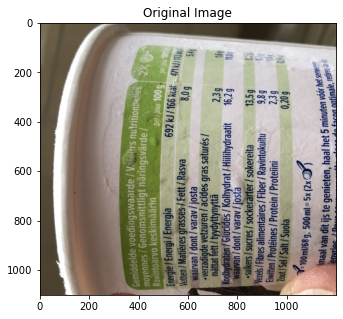

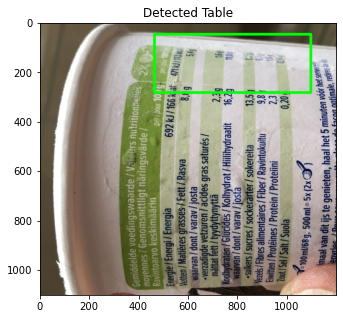

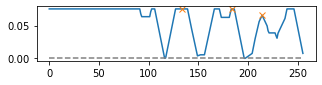

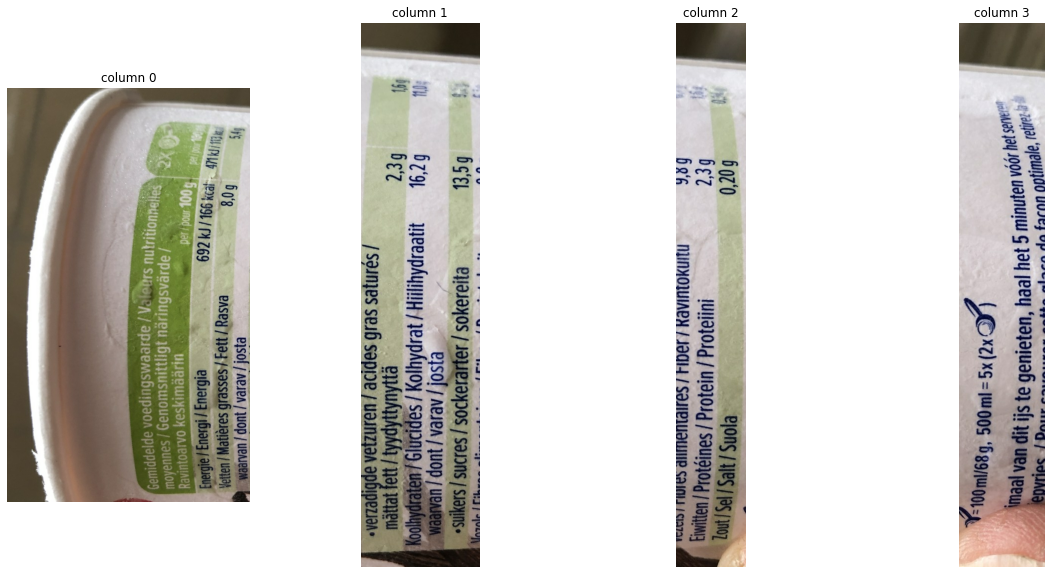

In [71]:
pipeline = Pipeline(model, tf.image.rot90(tf.image.decode_jpeg((tf.io.read_file(image)))))
pipeline.run(0.7,loop_until_converge=False)
column_mask_processor = ColumnMaskProcessor(pipeline.images[-1],pipeline.predicted_column_masks[-1].numpy().reshape(256,256).astype('uint8'))
column_mask_processor.process_mask()
column_mask_processor.get_peaks(10,25)
column_mask_processor.find_column_areas()

pipeline.tm_list[-1].draw_bounding_box()
plt.figure(figsize=(10,5))
plt.title("Original Image")
plt.imshow(pipeline.tm_list[0].image)
plt.figure(figsize=(10,5))
plt.title("Detected Table")
plt.imshow(pipeline.tm_list[-1].image_with_bounding_box)
plt.figure(figsize=(5,1))
plt.plot(column_mask_processor.signal)
plt.plot(column_mask_processor.signal_peaks, column_mask_processor.signal[column_mask_processor.signal_peaks], "x")
plt.plot(np.zeros_like(column_mask_processor.signal), "--", color="gray")
plt.show()

plt.figure(figsize=(20,10))
for num, area in enumerate(column_mask_processor.column_areas):
    plt.subplot(1,len(column_mask_processor.column_areas),num+1)
    plt.title("column {}".format(num))
    plt.axis('off')
    plt.imshow(area)

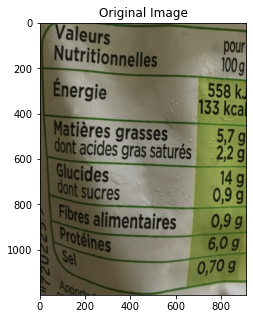

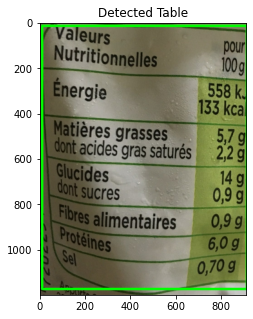

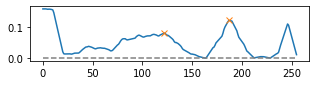

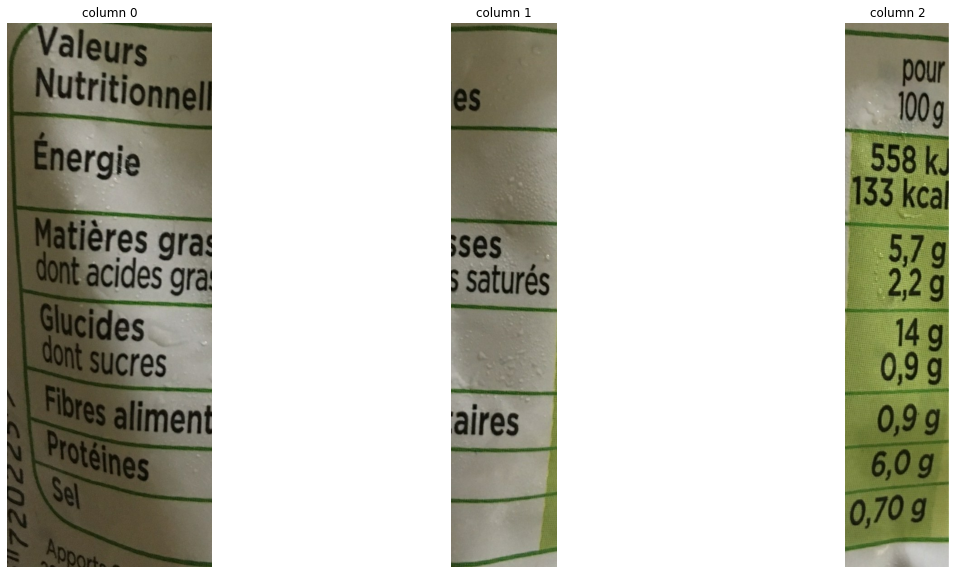

In [ ]:
i